Mikko Peltola

# Methods 2: Cluster analysis

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import timeit
from scipy import stats

## Import data and manipulate dataframe

In [2]:
df = pd.read_csv('C:\\Users\\micromikko\\AnacondaProjects\\data\\drone_delivery_v1.csv', sep=';')

In [3]:
df.drop("clientid", axis=1, inplace=True)
colnames = df.columns.get_values()
df.describe()

,x,y
count,5956.000000,5956.000000
mean,508.823177,427.554772
std,271.061462,289.044640
min,0.017692,0.043285
25%,282.582920,170.079921
50%,518.100892,397.786441
75%,727.156497,669.982518
max,999.533215,999.731720


## Plot of client locations

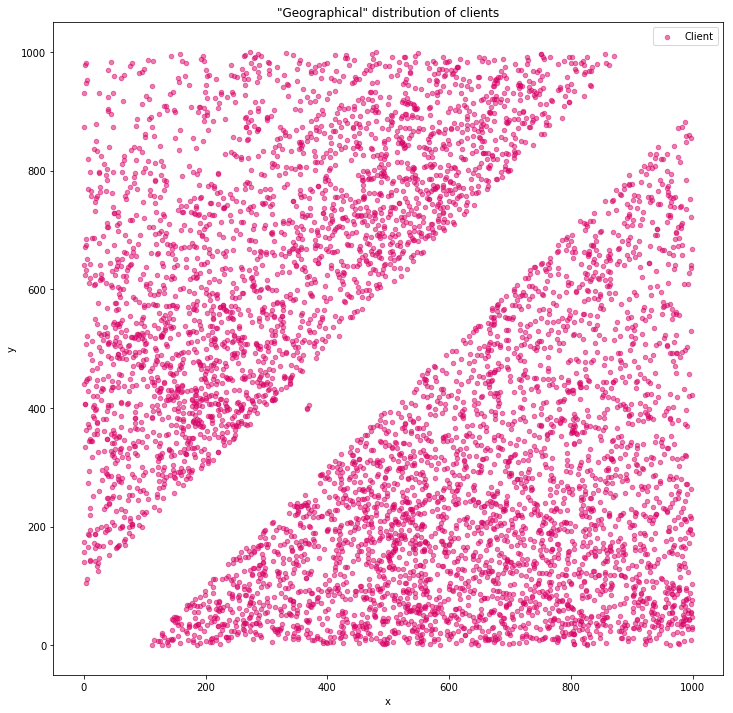

In [4]:
df.plot.scatter("x", "y", figsize=(12, 12), title="\"Geographical\" distribution of clients", label="Client", c="#d90166", alpha="0.5")

## Data normalized with StandardScaler

In [5]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.rename(columns={0:"x", 1:"y"}, inplace=True)

df_scaled.describe()

,x,y
count,5.956000e+03,5.956000e+03
mean,1.360005e-16,4.294751e-17
std,1.000084e+00,1.000084e+00
min,-1.877243e+00,-1.479174e+00
25%,-8.347157e-01,-8.908536e-01
50%,3.423022e-02,-1.029973e-01
75%,8.055430e-01,8.387912e-01
max,1.810480e+00,1.979711e+00


## Clustering initialized and applied to data
df_scaled copied to new variable to use for 3 clusters<br>
Locations of centroids (optimal locations) printed out.<br>
df_scaled is updated with the cluster data.

In [6]:
df_scaled3 = df_scaled.copy()

In [7]:
clusterCount = 3;

kmeans3 = cluster.KMeans(n_clusters=clusterCount)
start = timeit.default_timer()
kmeans3.fit(df_scaled3)
time_3_clusters = timeit.default_timer() - start

In [8]:
centroids3 = kmeans3.cluster_centers_
df_centroids3 = pd.DataFrame(centroids3, columns=colnames)
print("df_centroids3\n", df_centroids3, "\n")

df_scaled3["cluster"] = pd.Series(kmeans3.labels_)
print("df_scaled3, head(10)\n",df_scaled3.head(10))

df_centroids3
           x         y
0  0.708034 -0.747920
1  0.205291  1.246833
2 -1.152745 -0.095946 

df_scaled3, head(10)
           x         y  cluster
0  0.420414 -0.908923        0
1 -0.341154  0.701123        1
2 -0.797259  0.483628        2
3  0.842640 -0.904189        0
4  0.116781  0.883528        1
5  0.098312 -0.377534        0
6  0.485380  1.533727        1
7 -1.007425 -0.237030        2
8 -0.099345  0.809414        1
9  0.816155 -0.399200        0


## Scatter plot of depot locations and 3 corresponding client clusters

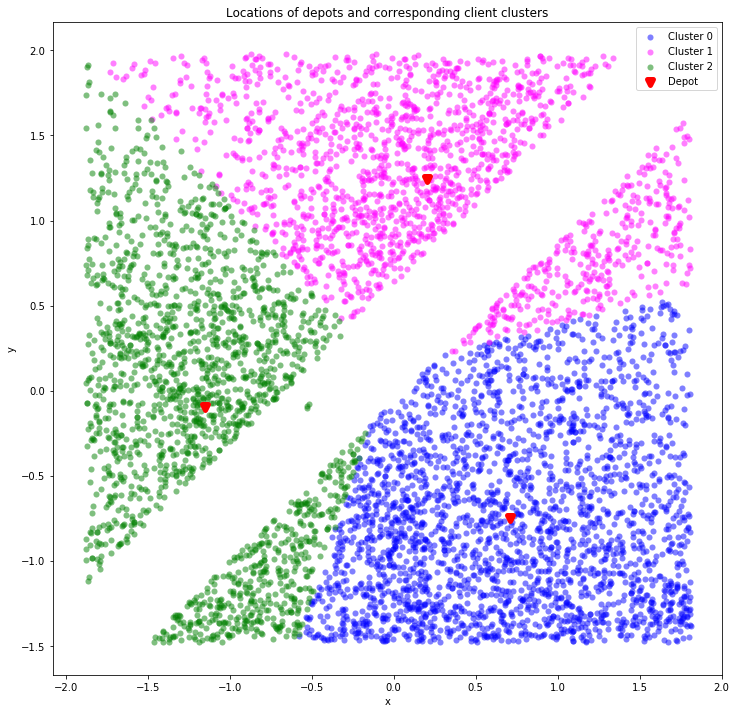

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

ax.scatter(df_scaled3.loc[df_scaled3["cluster"] == 0, 'x'], df_scaled3.loc[df_scaled3["cluster"] == 0, 'y'], color='blue', linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 0")
ax.scatter(df_scaled3.loc[df_scaled3["cluster"] == 1, 'x'], df_scaled3.loc[df_scaled3["cluster"] == 1, 'y'], color='magenta', linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 1")
ax.scatter(df_scaled3.loc[df_scaled3["cluster"] == 2, 'x'], df_scaled3.loc[df_scaled3["cluster"] == 2, 'y'], color='green', linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 2")

ax.scatter(df_centroids3["x"], df_centroids3["y"], color='red', linewidth=5, marker='v', label="Depot")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Locations of depots and corresponding client clusters")
plt.legend()
plt.show()

## Clustering initialized and applied to data
#### NOTE: Same as before, but for 10 cluster
df_scaled copied to new variable to use for 10 clusters<br>
Locations of centroids (optimal locations) printed out.<br>
df_scaled is updated with the cluster data.

In [10]:
df_scaled10 = df_scaled.copy()

In [11]:
clusterCount = 10;

kmeans10 = cluster.KMeans(n_clusters=clusterCount)
start = timeit.default_timer()
kmeans10.fit(df_scaled10)
time_10_clusters = timeit.default_timer() - start

In [12]:
centroids10 = kmeans10.cluster_centers_
df_centroids10 = pd.DataFrame(centroids10, columns=colnames)
print("df_centroids10\n", df_centroids10, "\n")

df_scaled10["cluster"] = pd.Series(kmeans10.labels_)
print("df_scaled3, head(10)\n",df_scaled10.head(10))

df_centroids10
           x         y
0  1.270363 -0.992496
1 -1.325459  1.261720
2 -0.765302 -1.170617
3  1.361151  0.589698
4 -1.495216 -0.201536
5  0.527040  1.610986
6  0.127438 -0.951821
7  0.607612 -0.140470
8 -0.922963  0.346324
9 -0.214287  1.188471 

df_scaled3, head(10)
           x         y  cluster
0  0.420414 -0.908923        6
1 -0.341154  0.701123        9
2 -0.797259  0.483628        8
3  0.842640 -0.904189        0
4  0.116781  0.883528        9
5  0.098312 -0.377534        7
6  0.485380  1.533727        5
7 -1.007425 -0.237030        4
8 -0.099345  0.809414        9
9  0.816155 -0.399200        7


## Scatter plot of depot locations and 10 corresponding client clusters

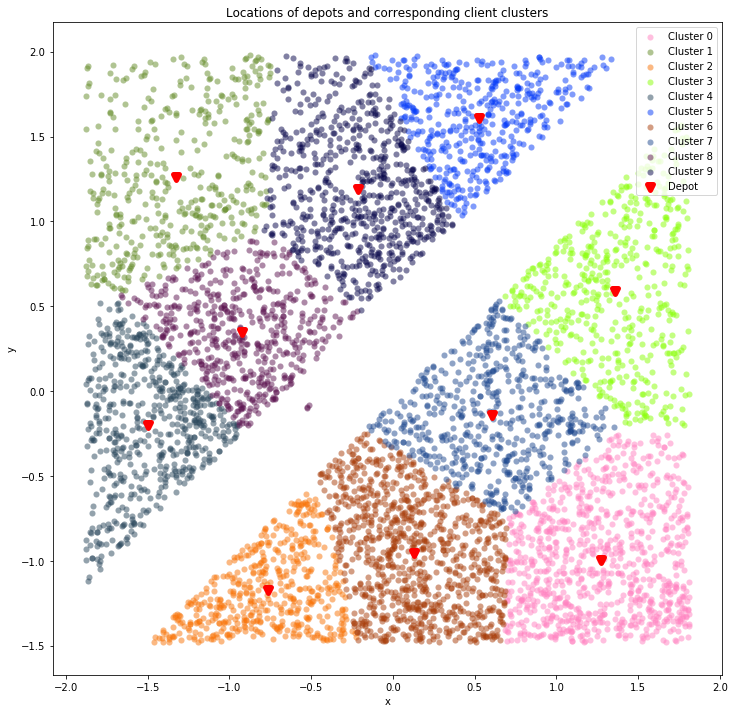

In [13]:
plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 0, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 0, 'y'], c="#ff81c0", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 0")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 1, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 1, 'y'], c="#638b27", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 1")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 2, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 2, 'y'], c="#f97306", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 2")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 3, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 3, 'y'], c="#89fe05", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 3")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 4, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 4, 'y'], c="#29465b", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 4")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 5, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 5, 'y'], c="#0339f8", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 5")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 6, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 6, 'y'], c="#a83c09", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 6")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 7, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 7, 'y'], c="#1e488f", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 7")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 8, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 8, 'y'], c="#5d1451", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 8")
ax.scatter(df_scaled10.loc[df_scaled10["cluster"] == 9, 'x'], df_scaled10.loc[df_scaled10["cluster"] == 9, 'y'], c="#040348", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 9")

ax.scatter(df_centroids10["x"], df_centroids10["y"], color='red', linewidth=5, marker='v', label="Depot")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Locations of depots and corresponding client clusters")
plt.legend()
plt.show()

## Clustering times
The kmeans clustering is run from 1 to 50 clusters for five "epochs", after which the average time elapsed is calculated for each numer of clusters separately.

In [14]:
num = 50 + 1
clustering_times = np.zeros(num-1)

avg_loop = 5
avg_time = np.zeros((num-1, avg_loop))
superstart = timeit.default_timer()
for n in range(avg_loop):
	for i in range(1, num):
		kmeans = cluster.KMeans(n_clusters=i)
		start = timeit.default_timer()
		kmeans.fit(df_scaled)
		clustering_times[i-1] = timeit.default_timer() - start
		avg_time[i-1][n] = (clustering_times[i-1])

superduration = timeit.default_timer() - superstart
avg_time = np.mean(avg_time, axis=1)

In [15]:
print(len(avg_time))
print("Average time for 1 to 50 clusters\n", avg_time, "\n")
print("Time elapsed for the whole thing:", superduration/60, "minutes")

50
Average time for 1 to 50 clusters
 [ 0.02516011  0.05455349  0.15340772  0.1786603   0.21441538  0.23342437
  0.23859317  0.35331184  0.38736708  0.42517149  0.49128183  0.45729485
  0.50059247  0.56950549  0.64376505  0.72039322  0.67585702  0.85204932
  0.93122793  0.8478885   0.8156566   1.19161053  1.26728374  1.24634826
  1.33691993  1.399533    1.47522315  1.42982685  1.53267914  1.98632831
  2.06089091  1.57903791  1.66907613  1.8408133   1.80947836  2.07130404
  2.36252643  2.05802699  1.90699172  2.08220504  2.03966855  2.06892919
  2.2190763   2.27829114  2.17769936  2.30254403  2.16221493  2.38616589
  2.35536381  2.40947298] 

Time elapsed for the whole thing: 5.373014100625402 minutes


## Observations about varying amounts of clusters and the time it takes to calculate them
The time it takes to cluster our data set is roughly linear (the slope of the linear regression is 0.052260), which means it scales fairly well to larger cluster counts . The final time values are the average of five runs from 1 to 50 clusters.<br><br>
The time it takes to cluster our data set is short due to the low number of variables (2) and a relatively low number of samples (<6000). In this specific example, whether the algorithm takes 0.18479 seconds or 0.44547 seconds is inconsequential. However, it is worth noting that the time increase was merely 141.08% when we increased our cluster count by 233.3%, which would be significant if our data set was much larger.


Time for 3 clusters:	 0.153407722415 seconds 
Time for 10 clusters:	 0.425171489469 seconds

Time increase:		 177.151295109 % 
Cluster increase:	 233.33333333333334 %
slope of linreg:	 0.0529614638145


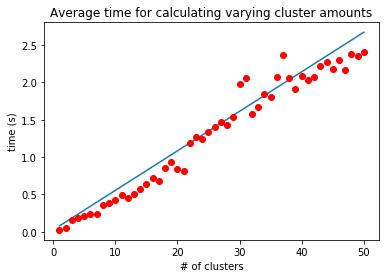

In [16]:
samples = np.arange(1, num)

slope, intercept, r_value, p_value, std_err = stats.linregress(samples, avg_time)

line = slope * samples + avg_time[0]
plt.plot(samples, line)

plt.plot(samples, avg_time, "ro")
plt.title("Average time for calculating varying cluster amounts")
plt.xlabel("# of clusters")
plt.ylabel("time (s)")

time_increase = ((avg_time[9] -  avg_time[2]) / avg_time[2]) * 100
cluster_increase = ((10-3) / 3) * 100
print("Time for 3 clusters:\t", avg_time[2], "seconds", "\nTime for 10 clusters:\t", avg_time[9], "seconds\n")

print("Time increase:\t\t", time_increase, "%", "\nCluster increase:\t", cluster_increase, "%")
print("slope of linreg:\t", slope)

## Agglomerative Clustering
The same methods as before will be used here, only with the kmeans clustering algorithm swapped for the agglomorative clustering algorithm.<br>
The algorithm will be tested with 3 and 10 clusters. The same operations are mostly fit in the same cells sequentially starting with 3 clusters, then 10.

In [17]:
df_scaledA3 = df_scaled.copy()
df_scaledA10 = df_scaled.copy()

In [18]:
clusterCount1 = 3;
clusterCount2 = 10

agglomerative3 = cluster.AgglomerativeClustering(linkage="average", n_clusters=clusterCount1)
agglomerative10 = cluster.AgglomerativeClustering(linkage="average", n_clusters=clusterCount2)

start = timeit.default_timer()
agglomerative3.fit(df_scaledA3)
time_A3 = timeit.default_timer() - start

start = timeit.default_timer()
agglomerative10.fit(df_scaledA10)
time_A10 = timeit.default_timer() - start

In [19]:
df_scaledA3["cluster"] = pd.Series(agglomerative3.labels_)
print("df_scaledA3, head(10)\n",df_scaledA3.head(10), "\n")

df_scaledA10["cluster"] = pd.Series(agglomerative10.labels_)
print("df_scaledA10, head(10)\n",df_scaledA10.head(10))

df_scaledA3, head(10)
           x         y  cluster
0  0.420414 -0.908923        1
1 -0.341154  0.701123        0
2 -0.797259  0.483628        0
3  0.842640 -0.904189        1
4  0.116781  0.883528        2
5  0.098312 -0.377534        1
6  0.485380  1.533727        2
7 -1.007425 -0.237030        0
8 -0.099345  0.809414        2
9  0.816155 -0.399200        1 

df_scaledA10, head(10)
           x         y  cluster
0  0.420414 -0.908923        1
1 -0.341154  0.701123        2
2 -0.797259  0.483628        2
3  0.842640 -0.904189        1
4  0.116781  0.883528        0
5  0.098312 -0.377534        1
6  0.485380  1.533727        3
7 -1.007425 -0.237030        2
8 -0.099345  0.809414        0
9  0.816155 -0.399200        1


## Plot for 3 agglomerative clusters

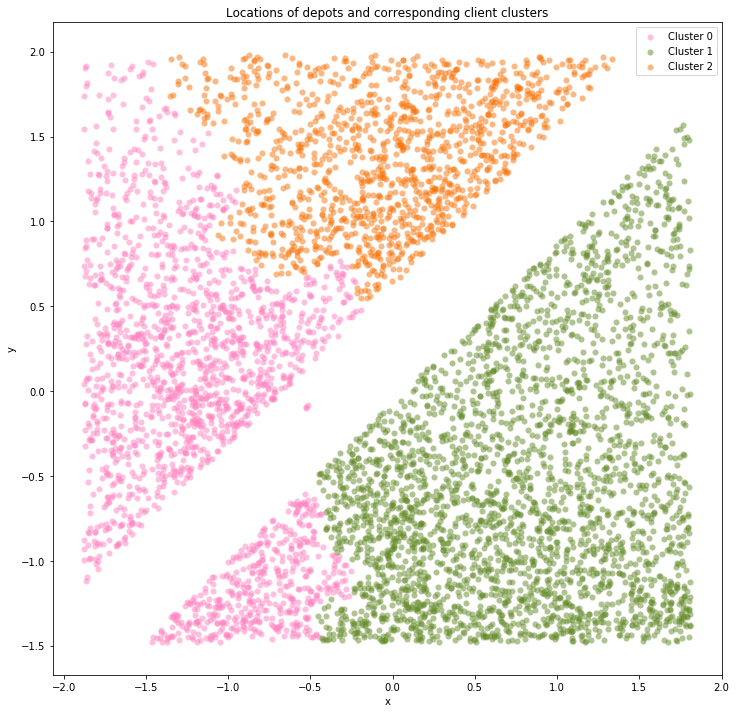

In [25]:
plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

ax.scatter(df_scaledA3.loc[df_scaledA3["cluster"] == 0, 'x'], df_scaledA3.loc[df_scaledA3["cluster"] == 0, 'y'], c="#ff81c0", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 0")
ax.scatter(df_scaledA3.loc[df_scaledA3["cluster"] == 1, 'x'], df_scaledA3.loc[df_scaledA3["cluster"] == 1, 'y'], c="#638b27", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 1")
ax.scatter(df_scaledA3.loc[df_scaledA3["cluster"] == 2, 'x'], df_scaledA3.loc[df_scaledA3["cluster"] == 2, 'y'], c="#f97306", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 2")


#ax.scatter(df_scaledA3["x"], df_centroids10["y"], color='red', linewidth=5, marker='v', label="Depot")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Locations of depots and corresponding client clusters")
plt.legend()
plt.show()

## Plot for 10 agglomerative clusters

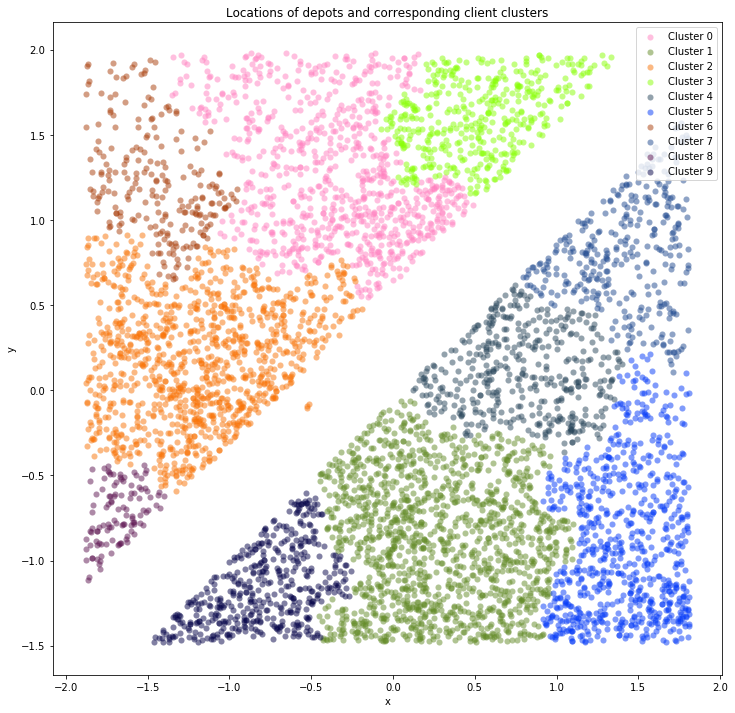

In [26]:
plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 0, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 0, 'y'], c="#ff81c0", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 0")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 1, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 1, 'y'], c="#638b27", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 1")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 2, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 2, 'y'], c="#f97306", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 2")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 3, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 3, 'y'], c="#89fe05", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 3")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 4, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 4, 'y'], c="#29465b", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 4")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 5, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 5, 'y'], c="#0339f8", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 5")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 6, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 6, 'y'], c="#a83c09", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 6")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 7, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 7, 'y'], c="#1e488f", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 7")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 8, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 8, 'y'], c="#5d1451", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 8")
ax.scatter(df_scaledA10.loc[df_scaledA10["cluster"] == 9, 'x'], df_scaledA10.loc[df_scaledA10["cluster"] == 9, 'y'], c="#040348", linewidth=0.05, marker ="o", alpha="0.5", label="Cluster 9")

#ax.scatter(df_centroids10["x"], df_centroids10["y"], color='red', linewidth=5, marker='v', label="Depot")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Locations of depots and corresponding client clusters")
plt.legend()
plt.show()

## Observations about varying amounts of clusters and the time it takes to calculate them
The final time values are the average of five runs from 1 to 50 clusters.<br><br>
The time it takes to cluster our data set varies between 1.2 and 1.5 seconds. Interestingly there seems to be a horizontal (periodic?) wave pattern. I can not be sure if it simply shows because of some other periodic processes my CPU is running, but I suspect the agglomerate algorithm really takes longer to finish with a certain predictable pattern.<br><br>
Even with the slight variation with the calculation times, since there is a predictable and stable pattern, we could say that the algorithm is extremely robust and invariant to the number of clusters when generalizing.

In [27]:
numA = 50 + 1
clustering_timesA = np.zeros(numA-1)

avg_loopA = 5
avg_timeA = np.zeros((numA-1, avg_loopA))
superstartA = timeit.default_timer()
for n in range(avg_loopA):
	for i in range(1, numA):
		agglo = cluster.AgglomerativeClustering(n_clusters=i)
		startA = timeit.default_timer()
		agglo.fit(df_scaled)
		clustering_timesA[i-1] = timeit.default_timer() - startA
		avg_timeA[i-1][n] += (clustering_timesA[i-1])

superdurationA = timeit.default_timer() - superstartA
avg_timeA = np.mean(avg_timeA, axis=1)

In [28]:
print(len(avg_timeA))
print("Average time for 1 to 50 clusters\n", avg_timeA, "\n")
print("Time elapsed for the whole thing:", superdurationA / 60, "minutes")

50
Average time for 1 to 50 clusters
 [ 1.47178267  1.44432383  1.40992868  1.49021894  1.43176746  1.39461292
  1.37930169  1.34090661  1.37710372  1.41213111  1.46716032  1.46315551
  1.37546255  1.39437275  1.50799303  1.34470624  1.38744269  1.3861859
  1.5617008   1.44583131  1.43241596  1.38567477  1.34425113  1.42918306
  1.38194733  1.39361632  1.35258124  1.42047071  1.40116604  1.42421799
  1.42298806  1.45184336  1.4801038   1.40058931  1.51338071  1.41434353
  1.55841162  1.47922283  1.51826778  1.4599026   1.52115855  1.5158186
  1.35177229  1.32110321  1.39142852  1.39603633  1.38589296  1.39908396
  1.38966804  1.50146061] 

Time elapsed for the whole thing: 5.943810783964892 minutes


Time for 3 clusters:	 1.35349410863 seconds 
Time for 10 clusters:	 1.36011334556 seconds

Time decrease:		 0.489048078231 % 
Cluster increase:	 233.33333333333334 %


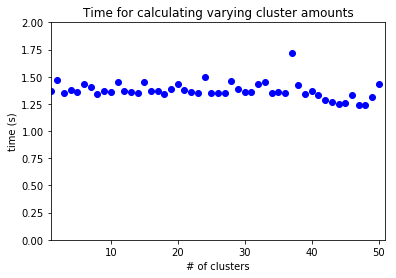

In [29]:
samplesA = np.arange(1, numA)

plt.plot(samplesA, clustering_timesA, "bo")
plt.title("Time for calculating varying cluster amounts")
plt.xlabel("# of clusters")
plt.ylabel("time (s)")
plt.xlim(1, num)
plt.ylim(0, 2)

time_A = ((clustering_timesA[9] -  clustering_timesA[2]) / clustering_timesA[2]) * 100
cluster_increaseA = ((10-3) / 3) * 100
print("Time for 3 clusters:\t", clustering_timesA[2], "seconds", "\nTime for 10 clusters:\t", clustering_timesA[9], "seconds\n")

print("Time decrease:\t\t", time_A, "%", "\nCluster increase:\t", cluster_increaseA, "%")
